In [7]:
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt

In [8]:
from sim import Sim

env = Sim()

In [9]:
from dqn_agent import Agent

agent = Agent(state_size=3, seed=0)

agent.load()

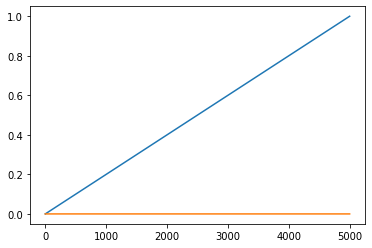

In [10]:
# watch an untrained agent
state = env.reset()
for j in range(5000):
    action = agent.act(state)
    env.render()
    state, reward, done = env.step(action)
    if done:
        break 
        
env.close()

In [11]:
def dqn(n_episodes=100, max_t=5000, eps_start=0.5, eps_end=0.001, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=300.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

scores = dqn(eps_start=0.1)

agent.save()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

Episode 46	Average Score: -19600.38

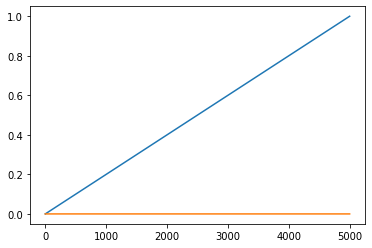

In [ ]:
state = env.reset()
for j in range(5000):
    action = agent.act(state)
    env.render()
    state, reward, done = env.step(action)
    if done:
        break 
        
env.close()